Calculando para proporção 10.0 / 90.0
Calculando para proporção 20.0 / 80.0
Calculando para proporção 30.0 / 70.0
Calculando para proporção 40.0 / 60.0
Calculando para proporção 50.0 / 50.0
Calculando para proporção 60.0 / 40.0
Calculando para proporção 70.0 / 30.0
Calculando para proporção 80.0 / 20.0
Calculando para proporção 90.0 / 10.0
  Treinamento/Teste     TxMin   TxMedia     TxMax  TxClasse1  TxClasse2  \
0       90.0 / 10.0  0.711111  0.916543  0.977778   0.365032   0.327586   
1       80.0 / 20.0  0.866667  0.933889  0.975000   0.353361   0.330161   
2       70.0 / 30.0  0.914286  0.947937  0.971429   0.343938   0.329203   
3       60.0 / 40.0  0.877778  0.951481  0.977778   0.353445   0.330868   
4       50.0 / 50.0  0.920000  0.950222  0.986667   0.336763   0.340037   
5       40.0 / 60.0  0.933333  0.957222  0.983333   0.367382   0.332559   
6       30.0 / 70.0  0.911111  0.959259  1.000000   0.338996   0.327413   
7       20.0 / 80.0  0.900000  0.957778  1.000000   0.3480

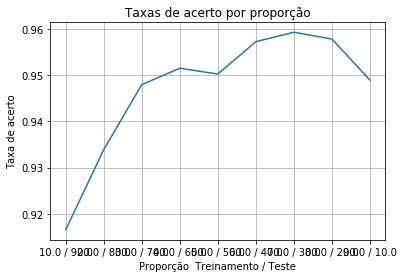

In [1]:
import math;
import pandas as pd;
import matplotlib.pyplot as plt;
import random;

%matplotlib inline
dataset=[a.split("\t") for a in open("Iris dataset.dat","r" ,encoding="utf-8").readlines()]
dataset=[[float(x) for x in a] for a in dataset]
tamanho=len(dataset)
tamMud=tamanho*0.1
tamTeste=tamanho*0.9;
tamTreinamento=tamanho*0.1
AcertoClassif={"Treinamento/Teste":[],"TxMin":[],"TxMedia":[],"TxMax":[],"TxClasse1":[],"TxClasse2":[],"TxClasse3":[]};
#dicionário para armazenar os valores,taxas que serão usados em gráfico e etc
dist={}

for a in range(0,tamanho):
    for b in range(a+1,tamanho):
        dist[a,b]=math.sqrt(pow((dataset[b][0]-dataset[a][0]),2)+pow((dataset[b][1]-dataset[a][1]),2)+pow((dataset[b][2]-dataset[a][2]),2)+pow((dataset[b][3]-dataset[a][3]),2))


def pegarDist(id1,id2):
    ids=[id1,id2];
    ids.sort();
    
    return dist[ids[0],ids[1]]
    
def classificar(teste, treinamento):
    distancias=[pegarDist(treinamento,a) for a in teste]
    indice=distancias.index(min(distancias));
    return dataset[(teste[indice])][4];


"""for a in range(1,50):
    print(dist[0,a]);

print(classificar(list(range(1,50)),0))
print(dist[0,17])"""    

#loop que continuará enquanto as proporções não forem 135/15(treinamento/teste)
while(tamTreinamento<=0.9*tamanho and tamTeste>=0.1*tamanho):
    print("Calculando para proporção %r / %r"%((tamTreinamento*100/tamanho),(tamTeste*100/tamanho)));
    
    
    acertosclasse1=0;#variavel aux para contar os acertos da classe 1
    acertosclasse2=0;#variavel aux para contar os acertos da classe 2
    acertosclasse3=0;#variavel aux para contar os acertos da classe 3
    acertototal=0;#variavel aux para contar acerto total
    minAcerto=10000;#variavel que guardará o valor min de acerto para cada proporção. é atualizada após cada rodada
    maxAcerto=0;#variavel para armazenar a quantidade máxima de acerto para cada proporção. é atualizada após cada rodada

    for x in range(0,30):
        somaAcerto=0;#variavel temp que somará o número de acertos de cada rodada, e ao final de cada rodada, é utilizada
        #pelo minAcerto, maxAcerto e acertototal
        #variavel para armazenar ids do dataset embaralhado
        datEmb=random.sample(list(range(0,tamanho)),tamanho);
        #dividindo dataset para treino e teste
        datTest=datEmb[:int(tamTeste)];
        datTrein=datEmb[int(tamTeste):];
        
        #print(classificar(dataset[0:948],dataset.values[948]));
        #for para iterar pelo vetor de treinamento e utilizar o classificador
        #[tamTeste:] cria uma lista que começa a partir do fim do vetor de teste. depois do ultimo elemento
        for a in datTrein:
            if(classificar(datTest,a)==dataset[a][4]):
                somaAcerto+=1;#se o resultado da classificação for igual ao do vetor de treinamento
                #incrementa a variavel somaAcerto
                if(dataset[a][4]==1):
                    acertosclasse1+=1;#incrementa a variavel caso o resultado seja da classe 1
                elif(dataset[a][4]==2):
                    acertosclasse2+=1;#incrementa a variavel caso o resultado seja da classe 2
                elif(dataset[a][4]==3):
                    acertosclasse3+=1;#incrementa a variavel caso o resultado seja da classe 3

        #verificando se o valor de somaAerto é maior do que o maior valor atual
        if(somaAcerto>maxAcerto):
            maxAcerto=somaAcerto;#caso seja, o valor de somaAcerto é atribuido a maxAcerto

        #verificando se o valor de somaAcerto é menor do que o menor valor atual
        if(somaAcerto<minAcerto):
            minAcerto=somaAcerto;#caso seja, o valor de somaAcerto é atribuido a minAcerto

        acertototal+=somaAcerto;#incrementando acertotal com valor de somaAcerto
        
    #adiconando os valores de cada proporção ao campo correspondente no dicionário AcertoClassif
    #ao mesmo tempo que adiciona, calcula os valores das taxas, transforma em porcentagem
    AcertoClassif["Treinamento/Teste"].insert(0,str(tamTreinamento*100/tamanho)+" / "+str(tamTeste*100/tamanho));
    AcertoClassif["TxMin"].insert(0,minAcerto/tamTreinamento);
    AcertoClassif["TxMedia"].insert(0,acertototal/(tamTreinamento*30));
    AcertoClassif["TxMax"].insert(0,maxAcerto/tamTreinamento);
    AcertoClassif["TxClasse1"].insert(0,acertosclasse1/(acertototal));
    AcertoClassif["TxClasse2"].insert(0,acertosclasse2/(acertototal));
    AcertoClassif["TxClasse3"].insert(0,acertosclasse3/(acertototal));
    tamTeste-=tamMud;#reduzindo em 100  tamanho do vetor de teste
    tamTreinamento+=tamMud;#incrementando em 100 o tamanho do vetor de treinamento

#criando um dataframe com os valores do dicionário. Isso é só para ficar mais organizado
#na hora de mostrar os resultados de cada proporção
tabelaTx = pd.DataFrame(AcertoClassif, columns=["Treinamento/Teste","TxMin","TxMedia","TxMax","TxClasse1","TxClasse2","TxClasse3"]);

#printando o resultado da classificação
print(tabelaTx)

#plotando gráfico com as taxas de acerto por proporção

plt.figure();
plt.title("Taxas de acerto por proporção");
plt.grid();
plt.plot(AcertoClassif["Treinamento/Teste"][::-1],AcertoClassif["TxMedia"])[::-1];
plt.xlabel("Proporção  Treinamento / Teste");
plt.ylabel("Taxa de acerto");
plt.show();